# Optimization

## Linear Programming (LP)

This notebook contains illustrative examples for solving linear programs using the **Simplex  method** and a specific version of a **Genetic Algorithm**. The examples cover all possible definitions of linear problems and a quick comparison of the two approaches alongside some matplotlib illustrations. 

First, import some stuff. Note that the notebook requires matplotlib to be installed.

In [127]:
from sigmaepsilon.math.function import Function, Equality, InEquality
from sigmaepsilon.math.optimize import (
    LinearProgrammingProblem as LPP,
    DegenerateProblemError,
    NoSolutionError,
)
from sigmaepsilon.math import atleast2d
import sympy as sy

### Solution of Symbolic LPPs with the Simplex Method

One of the great features of the optimization module is that is handles symbolic functions pretty well. Problems can be defined using `SymPy` expressions, or simple strings. The solution of an LPP can only result in one of the following cases:
    
* the problem has one unique optimizer
  
* the problem has multiple solutions
  
* there is no solution to the problem
  
* the problem is degenerate

The following set of blocks introduce an example for each of the above cases.

#### Unique Solution

In [128]:
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj1 = Function(3*x1 + 9*x3 + x2 + x4, variables=syms)
eq11 = Equality(x1 + 2*x3 + x4 - 4, variables=syms)
eq12 = Equality(x2 + x3 - x4 - 2, variables=syms)
lpp = LPP(cost=obj1, constraints=[eq11, eq12], variables=syms)
lpp.solve(order=[0, 2, 3, 1], raise_errors=True)['x']


array([0., 6., 0., 4.])

To obtain the results as a dictionary, use the `as_dict` keyword:

In [129]:
lpp.solve(order=[0, 2, 3, 1], raise_errors=True, as_dict=True)['x']


{x1: array(0.), x2: array(6.), x3: array(0.), x4: array(4.)}

#### Degenerate Solution

If the objective could be further decreased, but only on the expense of violating feasibility, the solution is degenerate.

In [130]:
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj2 = Function(3*x1 + x2 - 6*x3 + x4, variables=syms)
eq21 = Equality(x1 + 2*x3 + x4, variables=syms)
eq22 = Equality(x2 + x3 - x4 - 2, variables=syms)
P2 = LPP(cost=obj2, constraints=[eq21, eq22], variables=syms)
try:
    print(P2.solve(raise_errors=True)['x'])
except DegenerateProblemError:
    print('DegenerateProblemError')


[0. 2. 0. 0.]


#### No Solution

In [131]:
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj3 = Function(-3*x1 + x2 + 9*x3 + x4, variables=syms)
eq31 = Equality(x1 - 2*x3 - x4 + 2, variables=syms)
eq32 = Equality(x2 + x3 - x4 - 2, variables=syms)
P3 = LPP(cost=obj3, constraints=[eq31, eq32], variables=syms)
try:
    print(P3.solve(raise_errors=True)['x'])
except NoSolutionError:
    print('NoSolutionError')


NoSolutionError


#### Multiple Solutions

The following problem has two solutions.

In [132]:
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj4 = Function(3*x1 + 2*x2 + 8*x3 + x4, variables=syms)
eq41 = Equality(x1 - 2*x3 - x4 + 2, variables=syms)
eq42 = Equality(x2 + x3 - x4 - 2, variables=syms)
P4 = LPP(cost=obj4, constraints=[eq41, eq42], variables=syms)
print(P4.solve()['x'])

[[0. 1. 1. 0.]
 [0. 4. 0. 2.]]


### 2d example with `matplotlib`

In [133]:
x1, x2 = sy.symbols(['x1', 'x2'], positive=True)
syms = [x1, x2]
f = Function(x1 + x2, variables=syms)
ieq1 = InEquality(x1 - 1, op='>=', variables=syms)
ieq2 = InEquality(x2 - 1, op='>=', variables=syms)
ieq3 = InEquality(x1 + x2 - 4, op='<=', variables=syms)
lpp = LPP(cost=f, constraints=[ieq1, ieq2, ieq3], variables=syms)
x = atleast2d(lpp.solve()['x'])


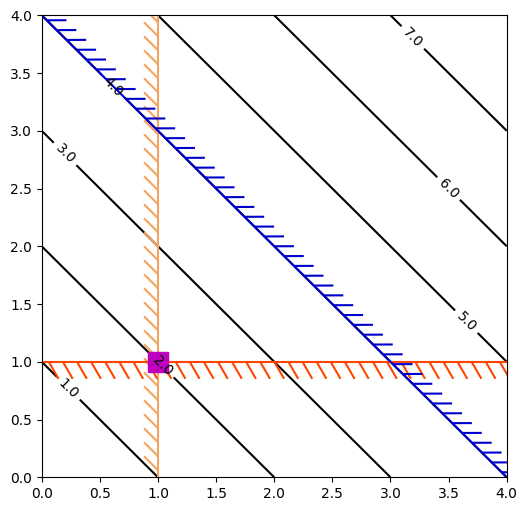

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(0.001, 4.0, nx)
yvec = np.linspace(0.001, 4.0, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = x1 + x2
g1 = x1 - 1
g2 = x2 - 1
g3 = x1 + x2 - 4

cntr = ax.contour(x1, x2, obj, colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown')
cg1.set(path_effects=[patheffects.withTickedStroke(angle=-135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
cg2.set(path_effects=[patheffects.withTickedStroke(angle=-60)])

cg3 = ax.contour(x1, x2, g3, [0], colors='mediumblue')
cg3.set(path_effects=[patheffects.withTickedStroke()])

ax.plot(x[:, 0], x[:, 1], 'ms', markersize=15)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()


## Nonlinear Programming (NLP)

Nonlinear programming deals with problems where the objective function, the constraints, or both are nonlinear.

### Binary Genetic Algorithm (BGA)

Genetic algorithms (GAs) are a type of meteheuristic optimization algorithm inspired by the principles of natural selection and genetics. They are used to find approximate solutions to complex problems by mimicking the process of evolution. In a genetic algorithm, a population of potential solutions (individuals) is evolved over successive generations. Each individual is evaluated based on a fitness function, and the best-performing individuals are selected to create offspring through processes like crossover (recombination) and mutation. Over time, the population evolves toward better solutions. Genetic algorithms are particularly useful for solving problems with large, complex search spaces where traditional optimization methods might struggle. They are widely used in areas such as engineering, computer science, and artificial intelligence.

One common variant is the binary genetic algorithm, where each potential solution is encoded as a string of binary digits (0s and 1s). In this representation, each bit (gene) corresponds to a specific attribute or decision variable of the solution.

#### Unconstrained nonlinear optimization with BGA

We will demonstrate the efficiency of the BGA on the Rosenbrock function, a widely used benchmark for evaluating the performance of nonlinear programming methods.

In [145]:
from sigmaepsilon.math.optimize import BinaryGeneticAlgorithm
from typing import Iterable
from numbers import Number


def Rosenbrock(x: Iterable[Number], a: Number = 1, b: Number = 100) -> float:
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


ranges = [[-2, 2], [-1, 3]]
BGA = BinaryGeneticAlgorithm(Rosenbrock, ranges, length=12, nPop=200)
result = BGA.solve()

result.phenotype, result.fittness

([0.9382173382173384, 0.9106227106227107], 0.09605647806116573)

If you want, you can have more control over the iterations like this:

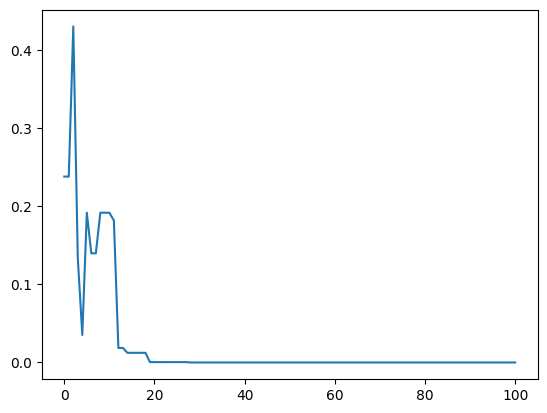

([0.9997557997557998, 0.9995115995115995], 5.963411488598288e-08)

In [136]:
import matplotlib.pyplot as plt

BGA = BinaryGeneticAlgorithm(Rosenbrock, ranges, length=12, nPop=200)
history = [Rosenbrock(BGA.best_phenotype())]

for _ in range(100):
    BGA.evolve(1)
    history.append(Rosenbrock(BGA.best_phenotype()))

plt.plot(history)

plt.show()

x = BGA.best_phenotype()
fx = Rosenbrock(x)
x, fx

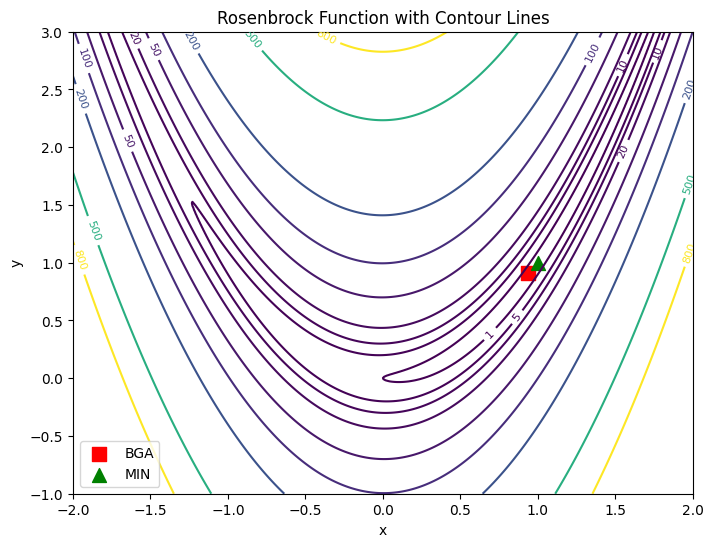

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Generate grid data
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([[Rosenbrock([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Create the plot with contour lines
plt.figure(figsize=(8, 6))
levels = [0, 1, 5, 10, 20, 50, 100, 200, 500, 800]
contour = plt.contour(X, Y, Z, levels=levels, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Rosenbrock Function with Contour Lines')
plt.xlabel('x')
plt.ylabel('y')

x = result.phenotype
plt.scatter(x[0], x[1], color="red", s=100, marker='s', label="BGA")

plt.scatter(1, 1, color="green", s=100, marker='^', label="MIN")

plt.legend()
plt.show()

#### Solution of an LPP with a Binary Genetic Algorithm

Although it's completely nuts to solve the previous LLP with a BGA instead of the dedicated solver, but wrapping up an LLP in standard form is actually quite easy and illustrates the robustness and versatility of BGA. 

In [138]:
x1, x2 = sy.symbols(['x1', 'x2'], positive=True)
syms = [x1, x2]
f = Function(x1 + x2, variables=syms)
ieq1 = InEquality(x1 - 1, op='>=', variables=syms)
ieq2 = InEquality(x2 - 1, op='>=', variables=syms)
ieq3 = InEquality(x1 + x2 - 4, op='<=', variables=syms)
lpp = LPP(cost=f, constraints=[ieq1, ieq2, ieq3], variables=syms)
lpp.solve()['x']


array([1., 1.])

The BGA implmented in `sigmaepsilon.math.optimize` does not accept constraints, all the requirements must be cooked into the objective function. A simple way of accomplishing this is to add penalties to the objective on constraint violations:

In [139]:
def cost(x, penalty: float = 1e12) -> float:
    obj_value = lpp.obj(x)
    return obj_value if lpp.feasible(x) else obj_value + penalty

result = BinaryGeneticAlgorithm(cost, [[0, 4], [0, 4]], length=12, nPop=200).solve()

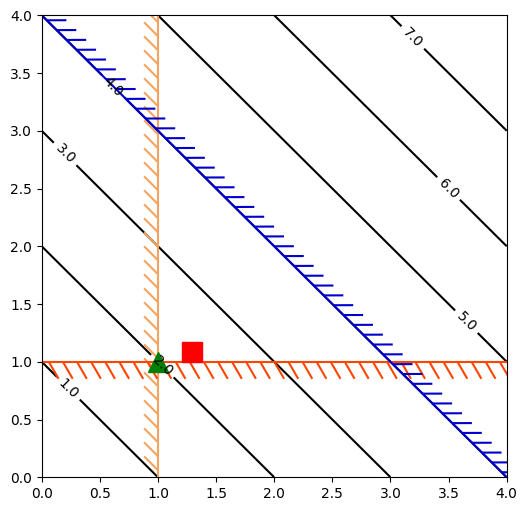

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(0.001, 4.0, nx)
yvec = np.linspace(0.001, 4.0, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = x1 + x2
g1 = x1 - 1
g2 = x2 - 1
g3 = x1 + x2 - 4

cntr = ax.contour(x1, x2, obj, colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown')
cg1.set(path_effects=[patheffects.withTickedStroke(angle=-135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
cg2.set(path_effects=[patheffects.withTickedStroke(angle=-60)])

cg3 = ax.contour(x1, x2, g3, [0], colors='mediumblue')
cg3.set(path_effects=[patheffects.withTickedStroke()])

ax.plot(1, 1, 'g^', markersize=15)

x = result.phenotype
ax.plot(x[0], x[1], 'rs', markersize=15)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()
